In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
data = pd.read_excel('seasonality_mortality_dataset.xlsx')


In [45]:
data.head()

,Month,Female,Male,Total,Year,Avg Temp,Low Temp,High Temp,Avg Humidity Percentage
0,April,6131,7560,13691,2020,30,25,34,75
1,August,9001,10726,19727,2020,27,21,32,85
2,December,10742,13564,24306,2020,28,22,33,73
3,February,8887,11267,20154,2020,29,24,35,69
4,January,9972,12535,22507,2020,28,22,35,70


In [47]:
data.describe()

,Female,Male,Total,Year,Avg Temp,Low Temp,High Temp,Avg Humidity Percentage
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,11095.666667,13512.958333,24608.625000,2020.500000,27.833333,22.791667,32.458333,79.833333
std,2481.826495,2814.129512,5270.782219,0.510754,0.916831,0.977093,1.215092,7.075166
min,6131.000000,7560.000000,13691.000000,2020.000000,27.000000,21.000000,31.000000,67.000000
25%,9451.500000,11225.500000,20807.250000,2020.000000,27.000000,22.000000,31.750000,73.750000
50%,10725.000000,13528.500000,24238.500000,2020.500000,28.000000,23.000000,32.000000,81.000000
75%,12655.000000,15758.000000,28153.500000,2021.000000,28.250000,23.000000,33.000000,86.000000
max,15949.000000,18697.000000,34646.000000,2021.000000,30.000000,25.000000,35.000000,89.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    24 non-null     object
 1   Female                   24 non-null     int64 
 2   Male                     24 non-null     int64 
 3   Total                    24 non-null     int64 
 4   Year                     24 non-null     int64 
 5   Avg Temp                 24 non-null     int64 
 6   Low Temp                 24 non-null     int64 
 7   High Temp                24 non-null     int64 
 8   Avg Humidity Percentage  24 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.8+ KB


In [77]:
data['Month']= pd.to_datetime(data['Month'], format='%B').dt.month

In [15]:
data.head()

,Month,Female,Male,Total,Year,Avg Temp,Low Temp,High Temp,Avg Humidity Percentage
0,4,6131,7560,13691,2020,30,25,34,75
1,8,9001,10726,19727,2020,27,21,32,85
2,12,10742,13564,24306,2020,28,22,33,73
3,2,8887,11267,20154,2020,29,24,35,69
4,1,9972,12535,22507,2020,28,22,35,70


In [51]:
data.describe()

,Female,Male,Total,Year,Avg Temp,Low Temp,High Temp,Avg Humidity Percentage
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,11095.666667,13512.958333,24608.625000,2020.500000,27.833333,22.791667,32.458333,79.833333
std,2481.826495,2814.129512,5270.782219,0.510754,0.916831,0.977093,1.215092,7.075166
min,6131.000000,7560.000000,13691.000000,2020.000000,27.000000,21.000000,31.000000,67.000000
25%,9451.500000,11225.500000,20807.250000,2020.000000,27.000000,22.000000,31.750000,73.750000
50%,10725.000000,13528.500000,24238.500000,2020.500000,28.000000,23.000000,32.000000,81.000000
75%,12655.000000,15758.000000,28153.500000,2021.000000,28.250000,23.000000,33.000000,86.000000
max,15949.000000,18697.000000,34646.000000,2021.000000,30.000000,25.000000,35.000000,89.000000


In [53]:
data.isna().sum()

Month                      0
Female                     0
Male                       0
Total                      0
Year                       0
Avg Temp                   0
Low Temp                   0
High Temp                  0
Avg Humidity Percentage    0
dtype: int64

In [109]:
data['Month_Year'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1).astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')


In [123]:
data.head()

,Month,Female,Male,Total,Year,Avg Temp,Low Temp,High Temp,Avg Humidity Percentage,Month_Year
0,4,6131,7560,13691,2020,30,25,34,75,2020-04-01
1,8,9001,10726,19727,2020,27,21,32,85,2020-08-01
2,12,10742,13564,24306,2020,28,22,33,73,2020-12-01
3,2,8887,11267,20154,2020,29,24,35,69,2020-02-01
4,1,9972,12535,22507,2020,28,22,35,70,2020-01-01


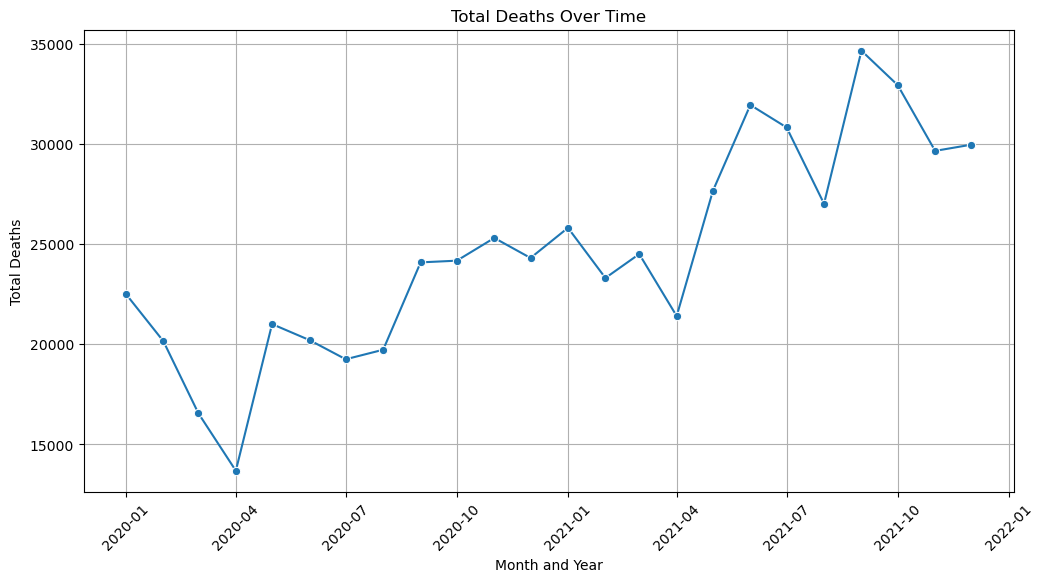

In [115]:
# Plotting the trendline
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Month_Year', y='Total', marker='o')

# Customize the plot
plt.title('Total Deaths Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


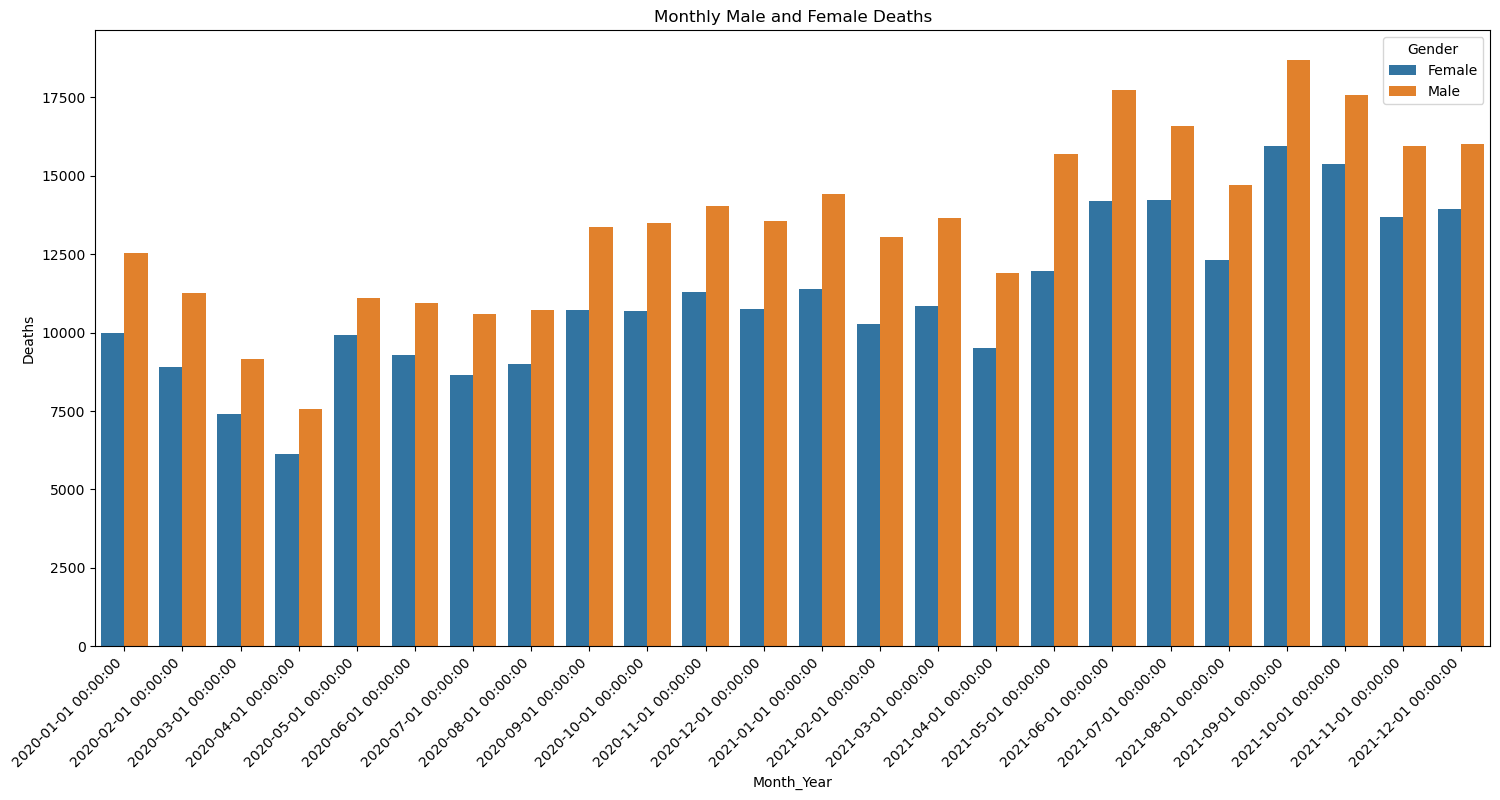

In [147]:
monthly_gender_deaths = data.groupby(['Month_Year'])[['Female', 'Male']].sum().reset_index()
monthly_gender_deaths = pd.melt(monthly_gender_deaths, id_vars=['Month_Year'], value_vars=['Female', 'Male'], var_name='Gender', value_name='Deaths')

plt.figure(figsize=(18, 8))
sns.barplot(x='Month_Year', y='Deaths', hue='Gender', data=monthly_gender_deaths)
plt.title('Monthly Male and Female Deaths')
plt.xlabel('Month_Year')
plt.ylabel('Deaths')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
y_total = data['Total']
y_male = data['Male']
y_female = data['Female']

In [19]:
X = data[['Month', 'Year','Avg Temp', 'Low Temp', 'High Temp','Avg Humidity Percentage']]
X = sm.add_constant(X)

In [36]:
poisson_model_total = sm.GLM(y_total, X, family=sm.families.Poisson()).fit(cov_type='HC0')
poisson_model_male = sm.GLM(y_male, X, family=sm.families.Poisson()).fit(cov_type='HC0')
poisson_model_female = sm.GLM(y_female, X, family=sm.families.Poisson()).fit(cov_type='HC0')

In [37]:
summary_total = poisson_model_total.summary()
summary_male = poisson_model_male.summary()
summary_female = poisson_model_female.summary()

In [38]:
summary_total

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Total   No. Observations:                   24
Model:                            GLM   Df Residuals:                       17
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2003.2
Date:                Sun, 28 Jul 2024   Deviance:                       3720.1
Time:                        15:15:17   Pearson chi2:                 3.71e+03
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC0                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -747.1594     94.156     -7.935      0.000    -931.702    -562.617
Month                       0.0299      0.004      7.420      0.000       0.022       0.038
Year                        0.3748      0.046      8.065      0.000       0.284       0.466
Avg Temp                   -0.1435      0.029     -4.878      0.000      -0.201      -0.086
Low Temp                   -0.0150      0.020     -0.736      0.462      -0.055       0.025
High Temp                   0.1198      0.023      5.111      0.000       0.074       0.166
Avg Humidity Percentage     0.0034      0.002      1.463      0.143      -0.001       0.008
===========================================================================================
"""

In [39]:
summary_male

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Male   No. Observations:                   24
Model:                            GLM   Df Residuals:                       17
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1181.4
Date:                Sun, 28 Jul 2024   Deviance:                       2090.9
Time:                        15:15:17   Pearson chi2:                 2.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC0                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -748.2046    101.713     -7.356      0.000    -947.559    -548.850
Month                       0.0284      0.005      5.935      0.000       0.019       0.038
Year                        0.3750      0.050      7.473      0.000       0.277       0.473
Avg Temp                   -0.1504      0.029     -5.240      0.000      -0.207      -0.094
Low Temp                   -0.0130      0.021     -0.629      0.529      -0.053       0.027
High Temp                   0.1253      0.025      4.962      0.000       0.076       0.175
Avg Humidity Percentage     0.0026      0.002      1.044      0.296      -0.002       0.007
===========================================================================================
"""

In [40]:
summary_female

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Female   No. Observations:                   24
Model:                            GLM   Df Residuals:                       17
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1033.2
Date:                Sun, 28 Jul 2024   Deviance:                       1799.3
Time:                        15:15:17   Pearson chi2:                 1.80e+03
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC0                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -747.2016     89.538     -8.345      0.000    -922.694    -571.710
Month                       0.0317      0.003      9.393      0.000       0.025       0.038
Year                        0.3744      0.044      8.468      0.000       0.288       0.461
Avg Temp                   -0.1347      0.032     -4.263      0.000      -0.197      -0.073
Low Temp                   -0.0176      0.021     -0.845      0.398      -0.058       0.023
High Temp                   0.1128      0.023      4.847      0.000       0.067       0.158
Avg Humidity Percentage     0.0044      0.002      1.823      0.068      -0.000       0.009
===========================================================================================
"""